### 集成算法
### 种类：bagging,boosting,staking
### 集成算法考虑多个评估器的评价结果，汇总之后得到一个最终的结果
### bagging:模型独立，互相平行
### boosting:模型有序，逐渐提升

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn .tree import DecisionTreeClassifier
from sklearn.datasets import load_wine

%matplotlib inline
wine=load_wine()

# 数据划分
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(wine.data
                                                ,wine.target
                                                ,test_size=0.12
                                                ,random_state=25
                                               )

In [5]:
# 使用分类树和随机森林进行训练
def classifier():
    clf=DecisionTreeClassifier(random_state=25)
    rfc=RandomForestClassifier(random_state=25)
    clf=clf.fit(x_train,y_train)
    rfc=rfc.fit(x_train,y_train)
    score_c=clf.score(x_test,y_test)
    score_r=rfc.score(x_test,y_test)
    print("clf score is: %.2f , rfc score is %.2f"%(score_c,score_r))
    
classifier()

clf score is: 0.86 , rfc score is 0.95


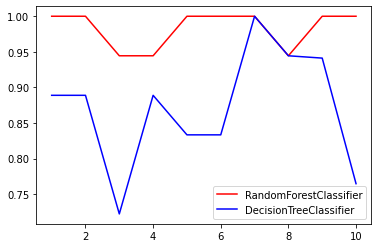

In [9]:
# 使用交叉验证进行评价
from sklearn.model_selection import cross_val_score



def crossScore():
    rfc=RandomForestClassifier(random_state=25)
    rfc_s=cross_val_score(rfc,wine.data,wine.target,cv=10)
    
    clf=DecisionTreeClassifier(random_state=25)
    clf_s=cross_val_score(clf,wine.data,wine.target,cv=10)
    
    plt.plot(range(1,11),rfc_s,color="red",label="rfc_score")
    plt.plot(range(1,11),clf_s,color="blue",label="clf_score")
    plt.legend()
    plt.show()

    
# crossScore()

# 交叉验证简化版
labels=["RandomForestClassifier","DecisionTreeClassifier"]
colors=["red","blue"]
def corss_Score():
    i=0
    for model in [RandomForestClassifier(random_state=25),DecisionTreeClassifier(random_state=25)]:
        score=cross_val_score(model,wine.data,wine.target,cv=10)
        plt.plot(range(1,11),score,color=colors[i],label=labels[i])
        i+=1
    plt.legend()
    plt.show()
    
corss_Score()
        
    

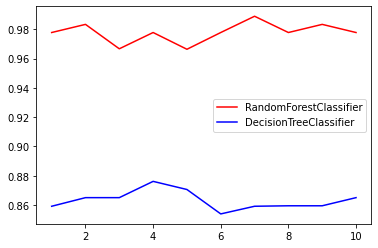

In [16]:

rfc_l=[]
clf_l=[]

# 设置了基学习器的大小为25的随机森林
for i in range(10):
    rfc=RandomForestClassifier(n_estimators=25)
    rfc_s=cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_l.append(rfc_s)
    clf=DecisionTreeClassifier()
    clf_s=cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_l.append(clf_s)
    
plt.plot(range(1,11),rfc_l,color=colors[0],label=labels[0])
plt.plot(range(1,11),clf_l,color=colors[1],label=labels[1])
plt.legend()
plt.show()

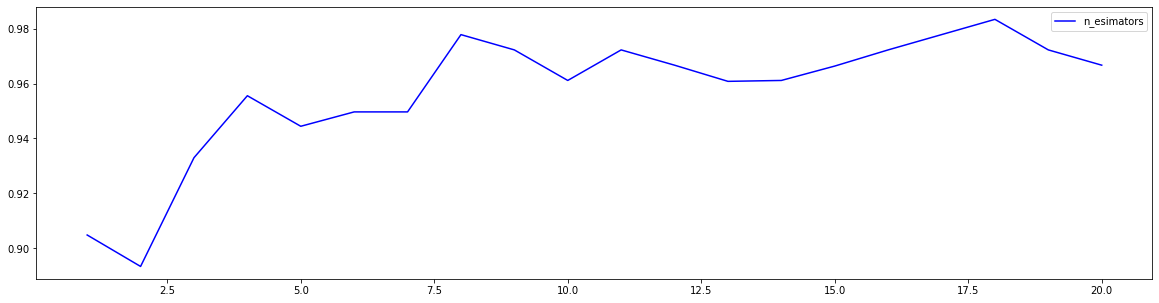

In [15]:
# 绘制n_estimators的学习曲线
superpa=[]
for i in range(20):
    rfc=RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s=cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
plt.figure(figsize=[20,5])
plt.plot(range(1,21),superpa,color="blue",label="n_esimators")
plt.legend()
plt.show()

In [18]:
import numpy as np
from scipy.special import comb

# 通过多个学习器降低错误率
np.array([comb(25,i)*(0.2**i)*(1-0.2)**(25-i) for i in range(13,26)]).sum()

0.00036904803455582827

In [28]:
# 查看随机森林中树的情况
def showTree():
    rfc=RandomForestClassifier(n_estimators=25,random_state=2)
    rfc.fit(x_train,y_train)
    # 使用estimators 查看森林中的树
    # rfc.estimators_[0].random_state
    # rfc.estimators_
    print(type(rfc.estimators_[0]))
    for i in range(len(rfc.estimators_)):
        print(rfc.estimators_[i].random_state)
showTree()

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212
520265852
1366773364
125164325
786090663
578016451


In [41]:
# 有放回的随机抽样数据集(自助采样)
# 一般会抽到63%的原始数据
# bootstrap and oob_score
# oob表示使用未被抽取的数据做测试集所得评分

def oob():
    rfc=RandomForestClassifier(n_estimators=25,oob_score=True)
    rfc=rfc.fit(wine.data,wine.target)
    score=rfc.oob_score_
    # 特征的重要性
    feature_i=rfc.feature_importances_
    # 返回节点在叶子节点的索引
    rfc.apply(x_test)
    # 返回预测类别
    rfc.predict(x_test)
    # 返回预测的概率
    rfc.predict_proba(x_test)
    return score
oob()

0.9831460674157303

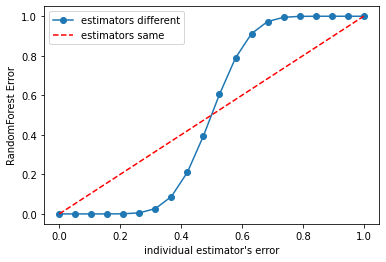

In [43]:
# 查看误差不同时，其分类错误概率值
import numpy as np

# 生成20个0~1之间的数（单调增加有序）
# 由图可知准确率必须要大于50%，错误率要小于50%
x=np.linspace(0,1,20)
y=[]
for epsilon in x:
    E=np.array([comb(25,i)*(epsilon**i)*(1-epsilon)**(25-i) for i in range(13,26)]).sum()
    y.append(E)
    
plt.plot(x,y,"o-",label="estimators different")
plt.plot(x,x,"--",color="red",label="estimators same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest Error")
plt.legend()
plt.show()